In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv("/content/drive/MyDrive/DATASET_ML/gurgaon_properties_missing_value_imputation.csv")
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.82,7586.0,3.0,2.0,2,2.0,New Property,850.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
1,flat,smart world gems,sector 89,0.95,8597.0,2.0,2.0,2,4.0,New Property,1226.0,1.0,1.0,0.0,0.0,0.0,0.0,38.0
2,flat,breez global hill view,sohna road,0.32,5470.0,2.0,2.0,1,17.0,New Property,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0
3,flat,bestech park view sanskruti,sector 92,1.60,8020.0,3.0,4.0,3+,10.0,Relatively New,1615.0,0.0,1.0,0.0,0.0,1.0,1.0,174.0
4,flat,suncity avenue,sector 102,0.48,9023.0,2.0,2.0,1,5.0,Relatively New,582.0,0.0,0.0,1.0,0.0,0.0,0.0,159.0


In [4]:
df.shape

(3554, 18)

In [5]:
df.head(5)

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.82,7586.0,3.0,2.0,2,2.0,New Property,850.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
1,flat,smart world gems,sector 89,0.95,8597.0,2.0,2.0,2,4.0,New Property,1226.0,1.0,1.0,0.0,0.0,0.0,0.0,38.0
2,flat,breez global hill view,sohna road,0.32,5470.0,2.0,2.0,1,17.0,New Property,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0
3,flat,bestech park view sanskruti,sector 92,1.60,8020.0,3.0,4.0,3+,10.0,Relatively New,1615.0,0.0,1.0,0.0,0.0,1.0,1.0,174.0
4,flat,suncity avenue,sector 102,0.48,9023.0,2.0,2.0,1,5.0,Relatively New,582.0,0.0,0.0,1.0,0.0,0.0,0.0,159.0


In [6]:
train_df = df.drop(columns=['society','price_per_sqft'])

In [7]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,sector 36,0.82,3.0,2.0,2,2.0,New Property,850.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
1,flat,sector 89,0.95,2.0,2.0,2,4.0,New Property,1226.0,1.0,1.0,0.0,0.0,0.0,0.0,38.0
2,flat,sohna road,0.32,2.0,2.0,1,17.0,New Property,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0
3,flat,sector 92,1.60,3.0,4.0,3+,10.0,Relatively New,1615.0,0.0,1.0,0.0,0.0,1.0,1.0,174.0
4,flat,sector 102,0.48,2.0,2.0,1,5.0,Relatively New,582.0,0.0,0.0,1.0,0.0,0.0,0.0,159.0


## **Luxury score**

<Axes: ylabel='luxury_score'>

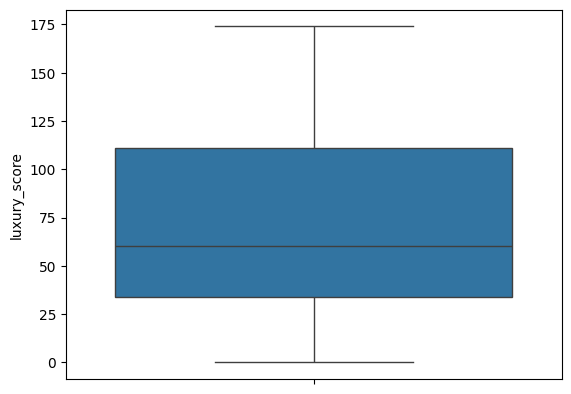

In [8]:
# Since we cannot ask user to enter the integer input for luxury score, so, it's better to convert the luxury score into the categorical columns.
sns.boxplot(df['luxury_score'])

In [10]:
# conveting the numerical values into categorical for the luxury score.
def categorize_luxury_score(score):
    if 0 <= score < 50:
        return "Low"
    elif 50 <= score < 150:
        return "Medium"
    elif 150 <= score <= 175:
        return "High"
    else:
        return None # or "Undefined" or any other label for scores outside the defined bins.

# Creating an new column and assigning the luxury score as categorical values.
train_df['luxury_category'] = train_df['luxury_score'].apply(categorize_luxury_score)

In [11]:
train_df.head(5)

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category
0,flat,sector 36,0.82,3.0,2.0,2,2.0,New Property,850.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,Low
1,flat,sector 89,0.95,2.0,2.0,2,4.0,New Property,1226.0,1.0,1.0,0.0,0.0,0.0,0.0,38.0,Low
2,flat,sohna road,0.32,2.0,2.0,1,17.0,New Property,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0,Low
3,flat,sector 92,1.60,3.0,4.0,3+,10.0,Relatively New,1615.0,0.0,1.0,0.0,0.0,1.0,1.0,174.0,High
4,flat,sector 102,0.48,2.0,2.0,1,5.0,Relatively New,582.0,0.0,0.0,1.0,0.0,0.0,0.0,159.0,High


## **floorNum**

<Axes: ylabel='floorNum'>

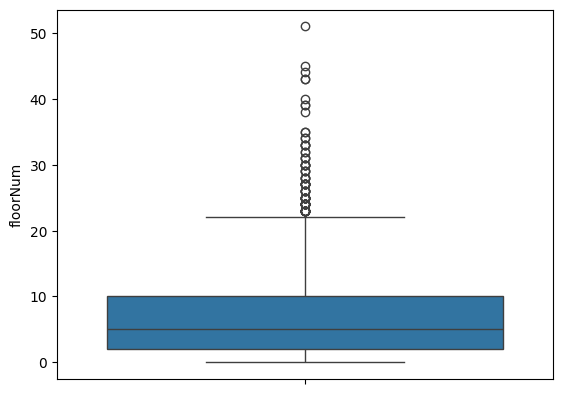

In [12]:
sns.boxplot(df['floorNum'])

In [13]:
# Converting the numerical columns into categorical columns.
def categorize_floor(floor):
    if 0 <= floor <= 2:
        return "Low Floor"
    elif 3 <= floor <= 10:
        return "Mid Floor"
    elif 11 <= floor <= 51:
        return "High Floor"
    else:
        return None # Or "Undefined" or any other label for floors outside the defined bins.

# making an new columns for the floor category.
train_df['floor_category'] = train_df['floorNum'].apply(categorize_floor)

In [14]:
train_df.head(5)

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category,floor_category
0,flat,sector 36,0.82,3.0,2.0,2,2.0,New Property,850.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,Low,Low Floor
1,flat,sector 89,0.95,2.0,2.0,2,4.0,New Property,1226.0,1.0,1.0,0.0,0.0,0.0,0.0,38.0,Low,Mid Floor
2,flat,sohna road,0.32,2.0,2.0,1,17.0,New Property,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0,Low,High Floor
3,flat,sector 92,1.60,3.0,4.0,3+,10.0,Relatively New,1615.0,0.0,1.0,0.0,0.0,1.0,1.0,174.0,High,Mid Floor
4,flat,sector 102,0.48,2.0,2.0,1,5.0,Relatively New,582.0,0.0,0.0,1.0,0.0,0.0,0.0,159.0,High,Mid Floor


In [15]:
# Dropping the luxury score and floorNum columns.
train_df.drop(columns=['floorNum', 'luxury_score'], inplace=True)

In [16]:
train_df.head(5)

,property_type,sector,price,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,flat,sector 36,0.82,3.0,2.0,2,New Property,850.0,0.0,0.0,0.0,0.0,0.0,0.0,Low,Low Floor
1,flat,sector 89,0.95,2.0,2.0,2,New Property,1226.0,1.0,1.0,0.0,0.0,0.0,0.0,Low,Mid Floor
2,flat,sohna road,0.32,2.0,2.0,1,New Property,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,Low,High Floor
3,flat,sector 92,1.60,3.0,4.0,3+,Relatively New,1615.0,0.0,1.0,0.0,0.0,1.0,1.0,High,Mid Floor
4,flat,sector 102,0.48,2.0,2.0,1,Relatively New,582.0,0.0,0.0,1.0,0.0,0.0,0.0,High,Mid Floor


## **Encoding Categorical Variables.**

In [23]:
from sklearn.preprocessing import OrdinalEncoder

# create a copy of the original data for the Label encoding.
data_label_encoded = train_df.copy()

# separating the categorical columns for encoding.
categorical_columns = train_df.select_dtypes(include=['object']).columns

# Apply Label encoding to categorical columns.
for col in categorical_columns:
    oe = OrdinalEncoder()
    data_label_encoded[col] = oe.fit_transform(data_label_encoded[[col]])
    print(oe.categories_)

[array(['flat', 'house'], dtype=object)]
[array(['dwarka expressway', 'gwal pahari', 'manesar', 'sector 1',
       'sector 10', 'sector 102', 'sector 103', 'sector 104',
       'sector 105', 'sector 106', 'sector 107', 'sector 108',
       'sector 109', 'sector 11', 'sector 110', 'sector 111',
       'sector 112', 'sector 113', 'sector 12', 'sector 13', 'sector 14',
       'sector 15', 'sector 17', 'sector 2', 'sector 21', 'sector 22',
       'sector 23', 'sector 24', 'sector 25', 'sector 26', 'sector 27',
       'sector 28', 'sector 3', 'sector 30', 'sector 31', 'sector 33',
       'sector 36', 'sector 37', 'sector 37d', 'sector 38', 'sector 39',
       'sector 4', 'sector 40', 'sector 41', 'sector 43', 'sector 45',
       'sector 46', 'sector 47', 'sector 48', 'sector 49', 'sector 5',
       'sector 50', 'sector 51', 'sector 52', 'sector 53', 'sector 54',
       'sector 55', 'sector 56', 'sector 57', 'sector 58', 'sector 59',
       'sector 6', 'sector 60', 'sector 61', 'sector 62', 

In [26]:
# Splitting the dataset into training and testing sets.
X_label = data_label_encoded.drop('price', axis=1)
y_label = data_label_encoded['price']

In [27]:
X_label.head()

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,0.0,36.0,3.0,2.0,2.0,1.0,850.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,0.0,95.0,2.0,2.0,2.0,1.0,1226.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0
2,0.0,103.0,2.0,2.0,1.0,1.0,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,99.0,3.0,4.0,4.0,3.0,1615.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,2.0
4,0.0,5.0,2.0,2.0,1.0,3.0,582.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0


In [28]:
y_label

,price
0,0.82
1,0.95
2,0.32
3,1.60
4,0.48
...,...
3549,0.37
3550,6.00
3551,0.60
3552,15.50


# **Performing Feature Selection with the help of Most Important Techniques.**

### **Technique 1 --> Correlation Analysis.**

<Axes: >

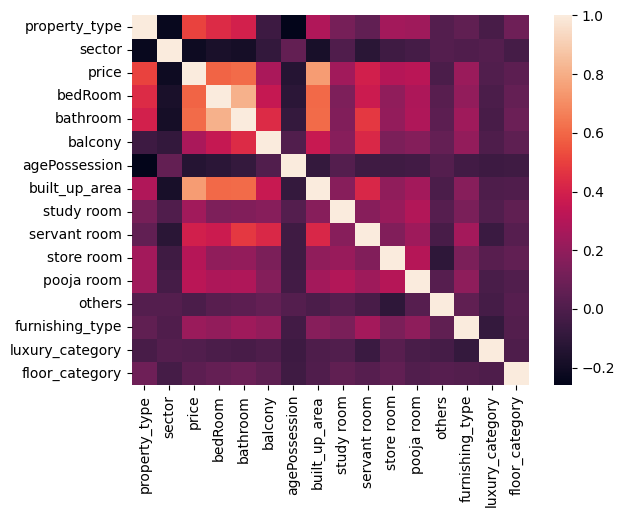

In [29]:
sns.heatmap(data_label_encoded.corr())

In [30]:
data_label_encoded.sample(1)

,property_type,sector,price,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
2009,0.0,57.0,2.09,4.0,4.0,4.0,3.0,2300.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,2.0


In [36]:
# calculating the correlation analysis value of the `price` columns to other rest of the columns.
fi_df1 = data_label_encoded.corr()['price'].iloc[1:].reset_index().rename(columns={
    'index':'feature',
    'price':'corr_coeff'
})
fi_df1

,feature,corr_coeff
0,sector,-0.212084
1,price,1.000000
2,bedRoom,0.591289
3,bathroom,0.609777
4,balcony,0.269637
5,agePossession,-0.134171
6,built_up_area,0.748574
7,study room,0.242955
8,servant room,0.391930
9,store room,0.305677


Observation:

*   From above `correlation` Observation, we can conclude that the `bedRoom`, `bathroom`, `built_up_area` are the most important features to predict the price of the house or flat.

## **Technique 2 --> Random Forest Feature Importance.**

In [41]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest Regressor on label encoded data.
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_label, y_label)

# Extract the most importance scores for the label encoded data.
fi_df2 = pd.DataFrame({
    'feature': X_label.columns,
    'rf_importance': rf_label.feature_importances_
}).sort_values(by='rf_importance', ascending=False)

In [42]:
fi_df2

,feature,rf_importance
6,built_up_area,0.650289
1,sector,0.102677
0,property_type,0.100063
3,bathroom,0.026261
2,bedRoom,0.023684
8,servant room,0.019175
5,agePossession,0.014153
4,balcony,0.012517
12,furnishing_type,0.010546
7,study room,0.008449


## **Technique 3 --> Gradient Boosting Feature Importances.**

In [51]:
from sklearn.ensemble import GradientBoostingRegressor

# Train a Random Forest regressor on label encoded data.
gb_label = GradientBoostingRegressor()
gb_label.fit(X_label, y_label)

# Extract the most importance scores for label encoded data.
fi_df3 = pd.DataFrame({
    'feature': X_label.columns,
    'gb_importance': gb_label.feature_importances_
}).sort_values(by='gb_importance', ascending=False)

fi_df3

,feature,gb_importance
6,built_up_area,0.677795
1,sector,0.103291
0,property_type,0.098445
2,bedRoom,0.038355
3,bathroom,0.035939
8,servant room,0.023195
9,store room,0.010356
5,agePossession,0.004019
7,study room,0.003033
12,furnishing_type,0.002693


## **Technique 4 --> Permutation Importance.**

In [45]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

#
X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(X_label, y_label, test_size=0.2, random_state=42)

# Train a Random Forest Regressor on label encoded data.
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_train_label, y_train_label)

# Calculating the Permutation Importance.
perm_import = permutation_importance(rf_label, X_test_label, y_test_label, n_repeats=30, random_state=42)

# Organize the result in the DataFrame.
fi_df4 = pd.DataFrame({
    'feature': X_label.columns,
    'permuation_importance': perm_import.importances_mean
}).sort_values(by='permuation_importance', ascending=False)

fi_df4

,feature,permuation_importance
6,built_up_area,0.734257
0,property_type,0.200330
1,sector,0.181350
8,servant room,0.020919
2,bedRoom,0.018152
3,bathroom,0.017923
5,agePossession,0.005787
9,store room,0.001377
14,floor_category,0.001327
4,balcony,0.001000


## **Technique 5 --> LASSO**

In [46]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Standardize the features.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_label)

# Train a LASSO regression model.
# For the demostration purposes only, i am using the low value of the alpha which means the regularization stregnth.
lasso = Lasso(alpha=0.1, random_state=42)
lasso.fit(X_scaled, y_label)

# Extract Coefficients.
fi_df5 = pd.DataFrame({
    'feature': X_label.columns,
    'lasso_coeff': lasso.coef_
}).sort_values(by='lasso_coeff', ascending=False)

fi_df5

,feature,lasso_coeff
6,built_up_area,1.489908
0,property_type,0.680381
3,bathroom,0.278293
9,store room,0.162200
7,study room,0.117472
8,servant room,0.109652
12,furnishing_type,0.096992
10,pooja room,0.046096
1,sector,-0.000000
2,bedRoom,0.000000


## **Technique 6 --> RFE**


In [47]:
from sklearn.feature_selection import RFE

# Initialize the base estimator.
estimator = RandomForestRegressor()

# Apply RFE on the label-encoded and standardized training data.
selector_label = RFE(estimator, n_features_to_select=X_label.shape[1], step=1)
selector_label = selector_label.fit(X_label, y_label)

# Get the selected features based on RFE.
selected_features = X_label.columns[selector_label.support_]

# Extract the coefficients for the selected features from the underlying linear regression model.
selected_coefficients = selector_label.estimator_.feature_importances_

# Organize the results into a DataFrame.
fi_df6 = pd.DataFrame({
    'feature': selected_features,
    'rfe_score': selected_coefficients
}).sort_values(by='rfe_score', ascending=False)

fi_df6

,feature,rfe_score
6,built_up_area,0.647017
1,sector,0.103774
0,property_type,0.100856
3,bathroom,0.026156
2,bedRoom,0.026108
8,servant room,0.018466
5,agePossession,0.014864
4,balcony,0.012585
12,furnishing_type,0.010619
7,study room,0.009348


## **Technique 7 --> Linear Regression Weights**

In [48]:
# Train a linear regression model on the label-encoded and standardized training data
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()
linear_reg.fit(X_scaled, y_label)

# Extract coefficients
fi_df7 = pd.DataFrame({
    'feature': X_label.columns,
    'reg_coeffs': linear_reg.coef_
}).sort_values(by='reg_coeffs', ascending=False)

fi_df7

,feature,reg_coeffs
6,built_up_area,1.512629
0,property_type,0.712890
3,bathroom,0.281976
9,store room,0.204159
7,study room,0.180048
12,furnishing_type,0.173192
8,servant room,0.169605
10,pooja room,0.076893
13,luxury_category,0.066472
2,bedRoom,0.016790


## **Technique 8 - SHAP.**

In [49]:
!pip install shap

In [53]:
import shap

# Compute SHAP values using the trained Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_label, y_label)

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_label)

# Summing the absolute SHAP values across all samples to get an overall measure of feature importance
shap_sum = np.abs(shap_values).mean(axis=0)

# shap_values
fi_df8 = pd.DataFrame({
    'feature': X_label.columns,
    'SHAP_score': np.abs(shap_values).mean(axis=0)
}).sort_values(by='SHAP_score', ascending=False)

fi_df8

,feature,SHAP_score
6,built_up_area,1.255228
0,property_type,0.472561
1,sector,0.383193
3,bathroom,0.112949
8,servant room,0.095049
2,bedRoom,0.049834
4,balcony,0.040485
12,furnishing_type,0.027753
5,agePossession,0.027457
14,floor_category,0.024946


In [54]:
# Merging all the df.
final_fi_df = fi_df1.merge(fi_df2,on='feature').merge(fi_df3,on='feature').merge(fi_df4,on='feature').merge(fi_df5,on='feature').merge(fi_df6,on='feature').merge(fi_df7,on='feature').merge(fi_df8,on='feature').set_index('feature')

In [57]:
# normalize the score
final_fi_df = final_fi_df.divide(final_fi_df.sum(axis=0), axis=1)
final_fi_df

,corr_coeff,rf_importance,gb_importance,permuation_importance,lasso_coeff,rfe_score,reg_coeffs,SHAP_score
feature,,,,,,,,
sector,-0.062405,0.114093,0.114570,0.190217,-0.000000,0.115415,-0.031512,0.183518
bedRoom,0.173984,0.026317,0.042543,0.019040,0.000000,0.029037,0.006727,0.023866
bathroom,0.179424,0.029181,0.039864,0.018800,0.120965,0.029089,0.112968,0.054093
balcony,0.079339,0.013909,0.001939,0.001049,0.000000,0.013996,-0.026583,0.019389
agePossession,-0.039479,0.015726,0.004458,0.006070,-0.000000,0.016531,-0.000818,0.013149
built_up_area,0.220264,0.722593,0.751806,0.770156,0.647614,0.719593,0.606003,0.601150
study room,0.071488,0.009388,0.003364,-0.018993,0.051061,0.010397,0.072132,0.009245
servant room,0.115324,0.021307,0.025727,0.021942,0.047662,0.020537,0.067949,0.045521
store room,0.089944,0.009384,0.011487,0.001445,0.070503,0.007241,0.081792,0.008188


In [58]:
final_fi_df[['rf_importance','gb_importance','permuation_importance','rfe_score','SHAP_score']].mean(axis=1).sort_values(ascending=False)

,0
feature,
built_up_area,0.713060
sector,0.143563
bathroom,0.034206
bedRoom,0.028161
servant room,0.027007
agePossession,0.011187
balcony,0.010057
store room,0.007549
floor_category,0.005691


In [59]:
# to drop pooja room, study room, others
X_label

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,0.0,36.0,3.0,2.0,2.0,1.0,850.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,0.0,95.0,2.0,2.0,2.0,1.0,1226.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0
2,0.0,103.0,2.0,2.0,1.0,1.0,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,99.0,3.0,4.0,4.0,3.0,1615.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,2.0
4,0.0,5.0,2.0,2.0,1.0,3.0,582.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3549,0.0,90.0,2.0,2.0,1.0,3.0,532.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0
3550,1.0,12.0,5.0,5.0,4.0,3.0,6228.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
3551,0.0,23.0,1.0,1.0,1.0,0.0,665.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0
3552,1.0,44.0,5.0,6.0,3.0,0.0,5490.0,1.0,1.0,1.0,1.0,0.0,0.0,2.0,2.0


In [60]:
# with all the cols
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label, y_label, cv=5, scoring='r2')

scores.mean()

0.8191960463868672

In [61]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label.drop(columns=['pooja room', 'study room', 'others']), y_label, cv=5, scoring='r2')

scores.mean()

0.8181352606119189

In [62]:
export_df = X_label.drop(columns=['pooja room', 'study room', 'others'])
export_df['price'] = y_label

In [63]:
export_df.to_csv('gurgaon_properties_post_feature_selection.csv', index=False)

In [64]:
export_df

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,servant room,store room,furnishing_type,luxury_category,floor_category,price
0,0.0,36.0,3.0,2.0,2.0,1.0,850.0,0.0,0.0,0.0,1.0,1.0,0.82
1,0.0,95.0,2.0,2.0,2.0,1.0,1226.0,1.0,0.0,0.0,1.0,2.0,0.95
2,0.0,103.0,2.0,2.0,1.0,1.0,1000.0,0.0,0.0,0.0,1.0,0.0,0.32
3,0.0,99.0,3.0,4.0,4.0,3.0,1615.0,1.0,0.0,1.0,0.0,2.0,1.60
4,0.0,5.0,2.0,2.0,1.0,3.0,582.0,0.0,1.0,0.0,0.0,2.0,0.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3549,0.0,90.0,2.0,2.0,1.0,3.0,532.0,0.0,0.0,0.0,2.0,2.0,0.37
3550,1.0,12.0,5.0,5.0,4.0,3.0,6228.0,1.0,1.0,0.0,0.0,1.0,6.00
3551,0.0,23.0,1.0,1.0,1.0,0.0,665.0,0.0,0.0,1.0,2.0,2.0,0.60
3552,1.0,44.0,5.0,6.0,3.0,0.0,5490.0,1.0,1.0,0.0,2.0,2.0,15.50
